In [1]:
# ==============================
# Primera celda - Importaciones
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import joblib

sns.set(style='whitegrid')
print("Todas las librerías cargadas.")


Todas las librerías cargadas.


In [2]:
# ==============================
# Segunda celda - Carga de datos
# ==============================
datos = pd.read_csv("C:/RespaldoDB/samsung.csv")
datos.head()


,Date,Close,Volume
0,02/01/2008,10880,18047200
1,03/01/2008,10920,19346500
2,04/01/2008,10780,17997350
3,07/01/2008,10380,39787200
4,08/01/2008,10320,24783700


In [3]:
# ==============================
# Justificación del algoritmo
# ==============================
"""
Se elige el algoritmo K-Means porque:
- Es un método de agrupación sencillo y eficiente para conjuntos de datos numéricos.
- Permite segmentar los datos en grupos basados en patrones de cercanía.
- Es útil para encontrar tendencias ocultas sin etiquetas previas (análisis no supervisado).
"""


'\nSe elige el algoritmo K-Means porque:\n- Es un método de agrupación sencillo y eficiente para conjuntos de datos numéricos.\n- Permite segmentar los datos en grupos basados en patrones de cercanía.\n- Es útil para encontrar tendencias ocultas sin etiquetas previas (análisis no supervisado).\n'

In [4]:
# ==============================
# Preprocesamiento
# ==============================
# Seleccionar variables relevantes
X = datos[['Close', 'Volume']]

# Escalado para evitar que una variable domine sobre otra
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# ==============================
# Diseño del modelo
# ==============================
"""
Diseño:
-------
- Algoritmo: KMeans de scikit-learn.
- Número de clusters: determinado de forma empírica (ej. 3).
- Se entrena con los datos escalados de 'Close' y 'Volume'.
"""


"\nDiseño:\n-------\n- Algoritmo: KMeans de scikit-learn.\n- Número de clusters: determinado de forma empírica (ej. 3).\n- Se entrena con los datos escalados de 'Close' y 'Volume'.\n"

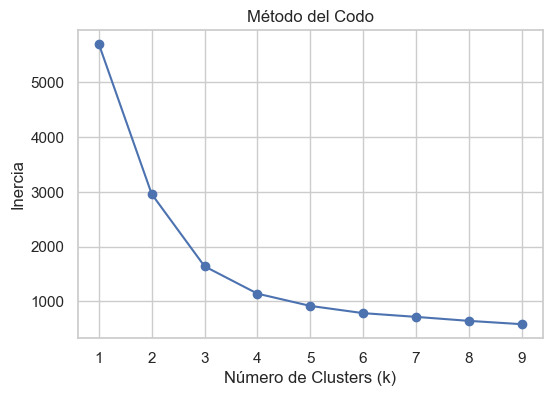

In [6]:
# Determinar número de clusters con método del codo
inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


In [7]:
# Entrenamiento del modelo con k óptimo (ejemplo: 3)
k_optimo = 3
modelo_kmeans = KMeans(n_clusters=k_optimo, random_state=42)
datos['Cluster'] = modelo_kmeans.fit_predict(X_scaled)


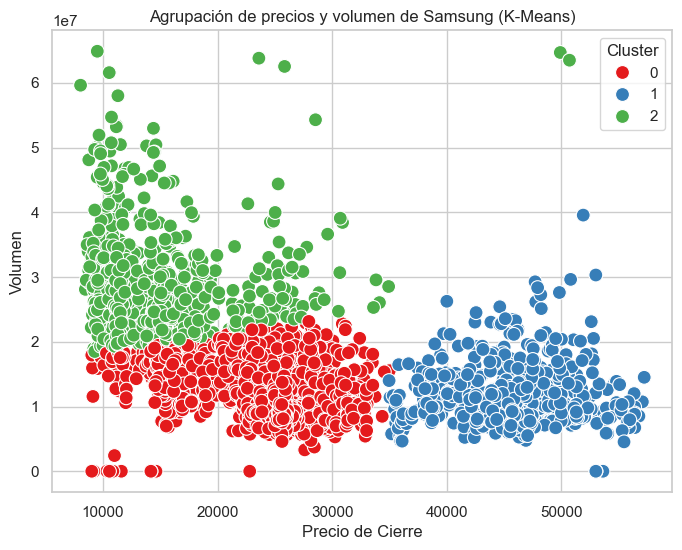

'\nInterpretación:\n---------------\nLos puntos se agrupan en 3 clusters distintos:\n- Un grupo con bajo volumen y precios medios.\n- Un grupo con alto volumen.\n- Un grupo con precios más altos y volumen medio.\nEsto puede reflejar distintos períodos de comportamiento del mercado.\n'

In [8]:
# ==============================
# Gráfica personalizada
# ==============================
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=datos, x='Close', y='Volume', hue='Cluster', palette='Set1', s=100
)
plt.title('Agrupación de precios y volumen de Samsung (K-Means)')
plt.xlabel('Precio de Cierre')
plt.ylabel('Volumen')
plt.legend(title='Cluster')
plt.show()

"""
Interpretación:
---------------
Los puntos se agrupan en 3 clusters distintos:
- Un grupo con bajo volumen y precios medios.
- Un grupo con alto volumen.
- Un grupo con precios más altos y volumen medio.
Esto puede reflejar distintos períodos de comportamiento del mercado.
"""


In [9]:
# ==============================
# Guardar modelo y escalador
# ==============================
joblib.dump(modelo_kmeans, "modelo_kmeans_samsung.pkl")
joblib.dump(scaler, "scaler_samsung.pkl")
print("Modelo y escalador guardados.")


Modelo y escalador guardados.
